<center><img src='../assets/images/aau_logo.png' width='10%'></center>

<br>
<center><h3>Addis Ababa University
<br>College of Natural and Computational Sciences
<br>Department of Computer Science</h3></center>

---
<center><h1 style="font-weight: bold;">CoSc 6262: Data Science</h1></center>
<center><img src='../assets/images/scipy_logo.png' width='15%'></center>
<br>
<center><h2>Assignment 3: SciPy I</h2> </center>

---

In this exercise you will exercise how to import libraries, load datasets, subset dataframes, summerize data, visualize data and simple test the realtion between the groups.

The dataset we practice is the Iris flower dataset (a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis). You could look up the description of dataframe here: 

https://en.wikipedia.org/wiki/Iris_flower_data_set


## Questions

### Step 1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pylab as plt

### Step 2: Load Iris dataset

For the convenience, we could load the data directly from the Machine Learning repository.

We are using pandas to load the data. Pandas is a frequently used library in this industry. We will have a tutorial about pandas later on. You are highly recommend to expolre it before the tutorial. To learn more, please refer: http://pandas.pydata.org/

Note that we are specifying the names of each column when loading the data. This will help later when we explore the data.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)

### Step 3: Subset Iris dataset

We want to subset the Iris dataset based on their class. Please fill in the blanks to subset the dataframes.

In [3]:
# Get the list of values in "class"
print("Unique classes:", iris["class"].unique())

# Subset the Iris dataset based on their "class" value
iris_setosa = iris[iris["class"] == "Iris-setosa"]
iris_versicolor = iris[iris["class"] == "Iris-versicolor"]
iris_virginica = iris[iris["class"] == "Iris-virginica"]

# Check the shape of each subset
print("Setosa shape:", iris_setosa.shape)
print("Versicolor shape:", iris_versicolor.shape)
print("Virginica shape:", iris_virginica.shape)

# Print the first 10 rows in iris_setosa
print(iris_setosa.head(10))

Unique classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Setosa shape: (50, 5)
Versicolor shape: (50, 5)
Virginica shape: (50, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


### Step 4: Summarize Iris dataset

Now we want to take a look at a summary of some attribute.
This includes the count, mean, standard deviation, median, the min and max values.

To start, let's take a close look at the Sepal Length.

In [4]:
# For Setosa
setosa_mean = iris_setosa["sepal-length"].mean()
setosa_std = iris_setosa["sepal-length"].std()
setosa_median = iris_setosa["sepal-length"].median()
setosa_min = iris_setosa["sepal-length"].min()
setosa_max = iris_setosa["sepal-length"].max()

print("\nSetosa Sepal Length:")
print("Mean:", setosa_mean)
print("Std:", setosa_std)
print("Median:", setosa_median)
print("Min:", setosa_min)
print("Max:", setosa_max)


Setosa Sepal Length:
Mean: 5.006
Std: 0.35248968721345136
Median: 5.0
Min: 4.3
Max: 5.8


In [5]:
# For Virginica
virginica_mean = iris_virginica["sepal-length"].mean()
virginica_std = iris_virginica["sepal-length"].std()
virginica_median = iris_virginica["sepal-length"].median()
virginica_min = iris_virginica["sepal-length"].min()
virginica_max = iris_virginica["sepal-length"].max()

print("\nVirginica Sepal Length:")
print("Mean:", virginica_mean)
print("Std:", virginica_std)
print("Median:", virginica_median)
print("Min:", virginica_min)
print("Max:", virginica_max)


Virginica Sepal Length:
Mean: 6.587999999999998
Std: 0.6358795932744322
Median: 6.5
Min: 4.9
Max: 7.9


### Step 5: Visualize the dataset

We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

1. The Boxplot

2. The Histogram

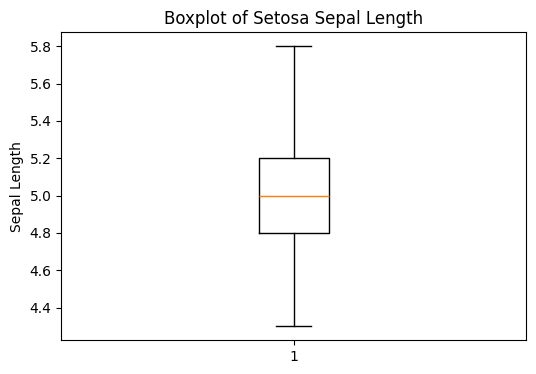

In [6]:
# Boxplot for Sepal Length of Setosa
plt.figure(figsize=(6,4))
plt.boxplot(iris_setosa["sepal-length"])
plt.title("Boxplot of Setosa Sepal Length")
plt.ylabel("Sepal Length")
plt.show()

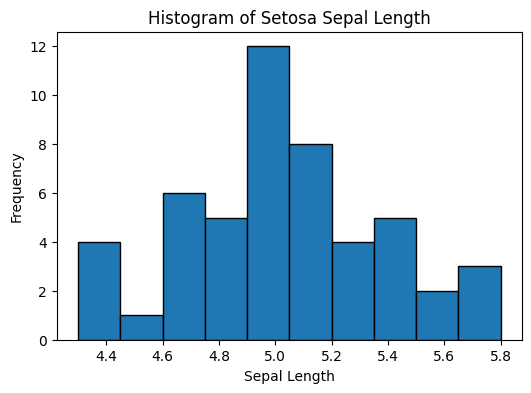

In [7]:
# Histogram for Sepal Length of Setosa
plt.figure(figsize=(6,4))
plt.hist(iris_setosa["sepal-length"], bins=10, edgecolor='black')
plt.title("Histogram of Setosa Sepal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()

### Step 6: Test some attributes between classes

In this step, please use a proper test to check the hypothesis that the sepal length is the same in these three classes. 

In [8]:
from scipy import stats

# Extract sepal-length for each group
setosa_sepal = iris_setosa["sepal-length"]
versicolor_sepal = iris_versicolor["sepal-length"]
virginica_sepal = iris_virginica["sepal-length"]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(setosa_sepal, versicolor_sepal, virginica_sepal)
print("ANOVA F statistic:", f_stat)
print("ANOVA p-value:", p_value)

# Interpretation:
if p_value < 0.05:
    print("\nSince p-value < 0.05, we reject the hypothesis that the sepal length is the same in these three classes.")
else:
    print("\nSince p-value >= 0.05, we cannot reject the hypothesis that the sepal length is the same in these three classes.")

ANOVA F statistic: 119.26450218450468
ANOVA p-value: 1.6696691907693826e-31

Since p-value < 0.05, we reject the hypothesis that the sepal length is the same in these three classes.


## Additional Cells

### Scatter plot of petal length vs petal width

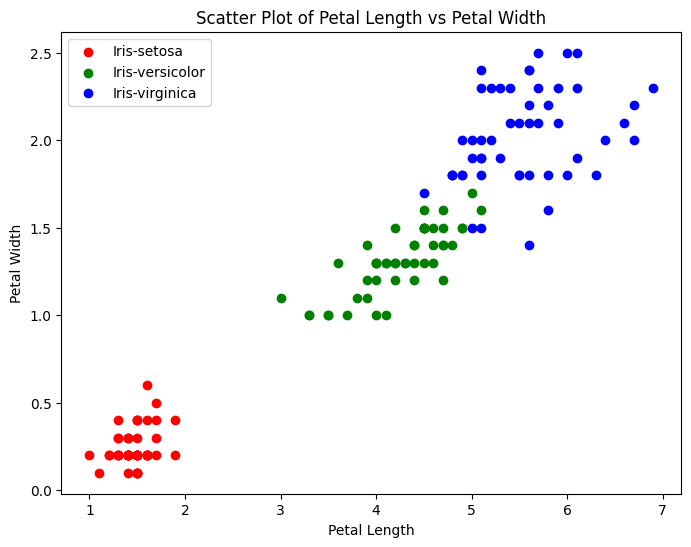

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(iris_setosa["petal-length"], iris_setosa["petal-width"], label="Iris-setosa", color='red')
plt.scatter(iris_versicolor["petal-length"], iris_versicolor["petal-width"], label="Iris-versicolor", color='green')
plt.scatter(iris_virginica["petal-length"], iris_virginica["petal-width"], label="Iris-virginica", color='blue')
plt.title("Scatter Plot of Petal Length vs Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

### Correlation matrix heatmap

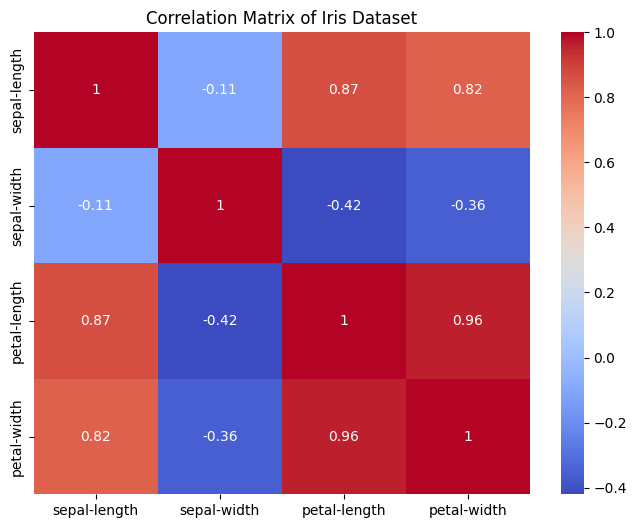

In [10]:
import seaborn as sns

# Compute correlation matrix for numeric features in the Iris dataset
corr_matrix = iris.iloc[:, :4].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Iris Dataset")
plt.show()

### Normal distribution

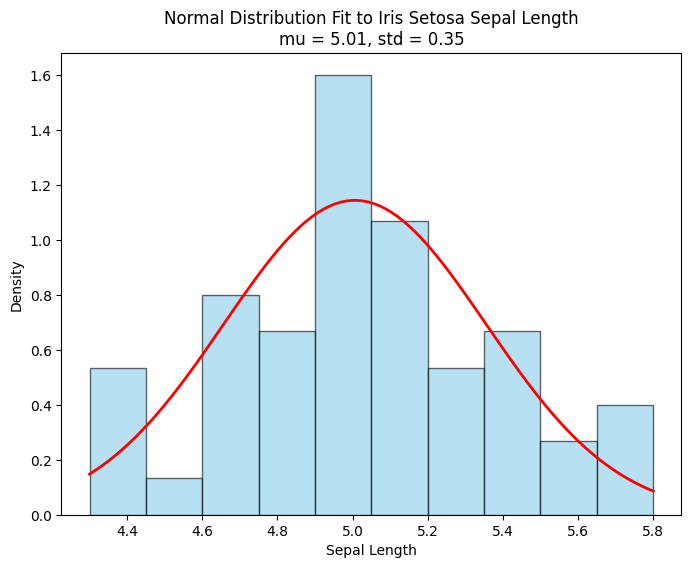

In [11]:
# Fit a normal distribution to Iris-setosa sepal length
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Get the sepal-length data for Iris-setosa
data = iris_setosa["sepal-length"]

# Fit a normal distribution
mu, std = norm.fit(data)

# Generate values for the fitted PDF
plt.figure(figsize=(8,6))
xmin, xmax = plt.xlim()
x = np.linspace(data.min(), data.max(), 100)
p = norm.pdf(x, mu, std)

# Plot the histogram and the fitted PDF curve
plt.hist(data, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.plot(x, p, 'r', linewidth=2)
plt.title("Normal Distribution Fit to Iris Setosa Sepal Length\nmu = {:.2f}, std = {:.2f}".format(mu, std))
plt.xlabel("Sepal Length")
plt.ylabel("Density")
plt.show()